In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change below to get to your file directory
%cd drive/MyDrive/Caltech/Senior/BEM120

[Errno 2] No such file or directory: 'drive/MyDrive/Caltech/Senior/BEM120'
/content/drive/MyDrive/Caltech/Senior/BEM120


In [ ]:
import pandas as pd

file_path = 'combine.csv'
combine = pd.read_csv(file_path)

file_path2 = 'college_stats.csv'
college_stats = pd.read_csv(file_path2)

file_path3 = 'draft_performance_rank.csv'
new_draftpicks = pd.read_csv(file_path3)

file_path4 = 'Reputation.xlsx'
reputation = pd.read_excel(file_path4)

file_path5 = 'Team_Success.xlsx'
team_success = pd.read_excel(file_path5)

In [ ]:
def convert_name(name):
    parts = name.split(", ")
    if len(parts) == 2:
        return f"{parts[1]} {parts[0]}"
    return name

combine['name'] = combine['PLAYER'].apply(convert_name)

In [ ]:
# Last season in college_stats
college_stats_sorted = college_stats.sort_values(by=['name', 'season'])
college_last = college_stats_sorted.drop_duplicates(subset='name', keep='last')

In [ ]:
#Removed all players that don't have both college stats and combine stats
merged_df = pd.merge(combine, college_last, on='name', how='inner')

columns_to_prefix = [
    'age', 'g', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta',
    'orb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
    'fg_pct', 'fg3_pct', 'ft_pct', 'mp_per_g', 'pts_per_g',
    'trb_per_g', 'ast_per_g', 'player_html'
]

merged_df = merged_df.rename(columns={col: f"college_{col}" for col in columns_to_prefix})
print(merged_df.columns)

Index(['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT',
       'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT', 'name', 'college_age',
       'college_id', 'college_g', 'college_mp', 'college_fg', 'college_fga',
       'college_fg3', 'college_fg3a', 'college_ft', 'college_fta',
       'college_orb', 'college_trb', 'college_ast', 'college_stl',
       'college_blk', 'college_tov', 'college_pf', 'college_pts',
       'college_fg_pct', 'college_fg3_pct', 'college_ft_pct',
       'college_mp_per_g', 'college_pts_per_g', 'college_trb_per_g',
       'college_ast_per_g', 'college_player_html', 'season'],
      dtype='object')


In [ ]:
# **WEBSCRAPING: Don't need to run it a second time - dataset is in folder
#
# import requests
# from bs4 import BeautifulSoup
# import io

# years = list(range(2000, 2025))  # 2000 to 2024

# base_url = "https://www.basketball-reference.com/draft/NBA_{}.html"

# List to store dataframes
# all_drafts = []

# for year in years:
#     url = base_url.format(year)
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#
#     table = soup.find('table', {'id': 'stats'})
#
#     if table:
#         try:
#             df = pd.read_html(io.StringIO(str(table)))[0]
#
#             df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
#
#             player_col = [col for col in df.columns if 'Player' in col][0]
#             df = df[df[player_col].notna()]
#
#             df = df.rename(columns={player_col: 'Player'})
#
#             df['Draft_Year'] = year
#
#             all_drafts.append(df)
#         except Exception as e:
#             print(f"Error processing year {year}: {e}")
#     else:
#         print(f"Table not found for year {year}")
#
# Combine all years into one DataFrame
# combined_df = pd.concat(all_drafts, ignore_index=True)
#
# combined_df.to_csv('nba_draft_2000_2024.csv', index=False)
#
# print(combined_df.head())

In [ ]:
draft_df = new_draftpicks.rename(columns={'Player': 'name'})
draft_prediction = pd.merge(merged_df, draft_df, on='name', how='inner')

print(draft_prediction.head())
print(f"Total players in merged set: {len(draft_prediction)}")

   YEAR               PLAYER POS    HGT    WGT    BMI     BF  WNGSPN  STNDRCH  \
0  2022        Davis, Johnny  PG  76.25  196.4  23.75  0.067   80.50    103.5   
1  2021      Barnes, Scottie  SF  79.00  225.4  25.39  0.053   86.75    108.0   
2  2021      Bassey, Charles   C  81.25  230.2  24.51  0.059   87.00    107.5   
3  2021  Boston Jr., Brandon  SF  77.75  188.0  21.86  0.060   82.75    104.0   
4  2021     Bouknight, James  SG  75.50  190.0  23.43  0.055   80.25    101.5   

   HANDL  ...  college_fg3_pct  college_ft_pct  college_mp_per_g  \
0   8.50  ...              NaN           0.798              38.7   
1   9.25  ...            0.275           0.621              24.8   
2   9.00  ...            0.305           0.759              30.4   
3   9.00  ...            0.300           0.785              30.4   
4   8.75  ...            0.293           0.778              31.7   

   college_pts_per_g  college_trb_per_g  college_ast_per_g  \
0               21.8                3.3   

In [ ]:
columns_to_remove = ['PLAYER', 'Unnamed: 0_level_0 Rk']
draft_prediction = draft_prediction.drop(columns=columns_to_remove, errors='ignore')

col = 'name'
draft_prediction = draft_prediction[[col] + [c for c in draft_prediction.columns if c != col]]

draft_prediction = draft_prediction.rename(columns={
    'Unnamed: 1_level_0 Pk': 'pick_number',
    'Unnamed: 2_level_0 Tm': 'Team',
    'Unnamed: 5_level_0 Yrs': 'career_length',
    'Round 1 College': 'college_team'
})

In [ ]:
print(draft_prediction.columns)

Index(['name', 'YEAR', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT',
       'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT', 'college_age', 'college_id',
       'college_g', 'college_mp', 'college_fg', 'college_fga', 'college_fg3',
       'college_fg3a', 'college_ft', 'college_fta', 'college_orb',
       'college_trb', 'college_ast', 'college_stl', 'college_blk',
       'college_tov', 'college_pf', 'college_pts', 'college_fg_pct',
       'college_fg3_pct', 'college_ft_pct', 'college_mp_per_g',
       'college_pts_per_g', 'college_trb_per_g', 'college_ast_per_g',
       'college_player_html', 'season', 'Draft_Year', 'performance_rank'],
      dtype='object')


In [ ]:
draft_prediction = draft_prediction[draft_prediction['YEAR'] < 2020]

In [ ]:
columns_to_remove = ['career_length', 'Totals G', 'Totals MP', 'Totals PTS', 'Totals TRB',
       'Totals AST', 'Shooting FG%', 'Shooting 3P%', 'Shooting FT%',
       'Per Game MP', 'Per Game PTS', 'Per Game TRB', 'Per Game AST',
       'Advanced WS', 'Advanced WS/48', 'Advanced BPM', 'Advanced VORP']
draft_prediction = draft_prediction.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
print(len(draft_prediction))

636


In [ ]:
conference_map = {
    'DUKE': 'ACC',
    'UNC': 'ACC',
    'VIRGINIA': 'ACC',
    'MIAMIFL': 'ACC',
    'WAKE': 'ACC',
    'LOUISVILLE': 'ACC',
    'FSU': 'ACC',
    'SYRACUSE': 'ACC',
    'GATECH': 'ACC',
    'BOSTONCOLL': 'ACC',
    'CLEMSON': 'ACC',
    'NCSTATE': 'ACC',
    'NOTREDAME': 'ACC',
    'VATECH': 'ACC',

    'KENTUCKY': 'SEC',
    'TENNESSEE': 'SEC',
    'FLORIDA': 'SEC',
    'LSU': 'SEC',
    'ALABAMA': 'SEC',
    'MISSST': 'SEC',
    'MISSOURI': 'SEC',
    'TEXASAM': 'SEC',
    'VANDY': 'SEC',
    'GEORGIA': 'SEC',
    'SFLORIDA': 'AAC',
    'ARKANSAS': 'SEC',
    'AUBURN': 'SEC',

    'MICHIGAN': 'Big Ten',
    'MICHIGANST': 'Big Ten',
    'OHIOST': 'Big Ten',
    'INDIANA': 'Big Ten',
    'IOWA': 'Big Ten',
    'PURDUE': 'Big Ten',
    'MARYLAND': 'Big Ten',
    'MINNESOTA': 'Big Ten',
    'WISCONSIN': 'Big Ten',
    'NEBRASKA': 'Big Ten',
    'ILLINOIS': 'Big Ten',
    'RUTGERS': 'Big Ten',
    'NORTHWESTERN': 'Big Ten',
    'UCLA': 'Big Ten',
    'USC': 'Big Ten',

    'UCLA': 'Pac-12',
    'OREGON': 'Pac-12',
    'OREGONST': 'Pac-12',
    'STANFORD': 'Pac-12',
    'ARIZONA': 'Pac-12',
    'ARIZONAST': 'Pac-12',
    'USC': 'Pac-12',
    'COLORADO': 'Pac-12',
    'UTAH': 'Pac-12',
    'CALIFORNIA': 'Pac-12',
    'WASHST': 'Pac-12',
    'WASHINGTON': 'Pac-12',

    'KANSAS': 'Big 12',
    'BAYLOR': 'Big 12',
    'TEXAS': 'Big 12',
    'TXTECH': 'Big 12',
    'OKLAHOMA': 'Big 12',
    'OKSTATE': 'Big 12',
    'KANSASST': 'Big 12',
    'TCU': 'Big 12',
    'IOWAST': 'Big 12',
    'WESTVIRGINIA': 'Big 12',

    'GONZAGA': 'WCC',
    'STMARYSCA': 'WCC',
    'PEPPERDINE': 'WCC',
    'BYU': 'Big 12',

    'UCONN': 'Big East',
    'VILLANOVA': 'Big East',
    'XAVIER': 'Big East',
    'CREIGHTON': 'Big East',
    'SETONHALL': 'Big East',
    'DEPAUL': 'Big East',
    'GEORGETOWN': 'Big East',
    'PROVIDENCE': 'Big East',
    'STJOHNS': 'Big East',
    'MARQUETTE': 'Big East',
    'BUTLER': 'Big East',

    'MEMPHIS': 'AAC',
    'HOUSTON': 'Big 12',
    'SMETHODIST': 'AAC',
    'TULANE': 'AAC',
    'TEMPLE': 'AAC',
    'TULSA': 'AAC',
    'CFLORIDA': 'Big 12',

    'YALE': 'Ivy League',
    'LEHIGH': 'Patriot League',
    'BUCKNELL': 'Patriot League',
    'WEBERST': 'Big Sky',
    'DAVIDSON': 'A-10',
    'VCU': 'A-10',
    'RICHMOND': 'A-10',
    'DAYTON': 'A-10',
    'STBONNY': 'A-10',
    'LASALLE': 'A-10',
    'GEORGIAST': 'Sun Belt',
    'ULALA': 'Sun Belt',
    'MURRAYST': 'MVC',
    'VALPO': 'MVC',
    'TNTECH': 'OVC',
    'TNMARTIN': 'OVC',
    'MOREHEAD': 'OVC',
    'BELMONT': 'MVC',
    'UNLV': 'Mountain West',
    'NEVADA': 'Mountain West',
    'NMEXICO': 'Mountain West',
    'SANDIEGOST': 'Mountain West',
    'COLORADOST': 'Mountain West',
    'FRESNOST': 'Mountain West',
    'UCSB': 'Big West',
    'CALSTFULL': 'Big West',
}

draft_prediction['Conference'] = draft_prediction['college_id'].map(conference_map).fillna('Unknown')

print(draft_prediction.head())

                        name  YEAR POS    HGT    WGT    BMI     BF  WNGSPN  \
58  Nickeil Alexander-Walker  2019  SG  76.25  203.8  24.64  0.059   81.50   
59                   Bol Bol  2019   C  84.75  208.0  20.36  0.071   91.00   
60               Jordan Bone  2019  SG  73.50  179.0  23.29  0.050   75.25   
61          Ignas Brazdeikis  2019  SF  77.75  220.8  25.68  0.060   81.25   
62            Brandon Clarke  2019  SF  79.25  207.2  23.19  0.049   80.25   

    STNDRCH  HANDL  ...  college_ft_pct  college_mp_per_g  college_pts_per_g  \
58    102.0   8.50  ...           0.778              34.3               16.2   
59    115.5   9.25  ...           0.757              29.8               21.0   
60     95.0   7.50  ...           0.835              32.9               13.5   
61    102.0   8.75  ...           0.773              29.6               14.8   
62    102.0   8.25  ...           0.694              28.1               16.9   

    college_trb_per_g  college_ast_per_g  \
58    

In [ ]:
reputation['ReputationScore'] = (
    0.6 * reputation['Percentage'] +
    0.4 * (reputation['Championships since 1985'] / reputation['Championships since 1985'].max())
)
print(reputation.head())

  Conference  Total wins  Total losses  Percentage  Championships since 1985  \
0        ACC         270           136       0.665                        10   
1        SEC         209           129       0.618                         6   
2    Big Ten         243           160       0.603                         3   
3   Big East         242           162       0.599                         8   
4     Big 12         155           113       0.578                         1   

   ReputationScore  
0           0.7990  
1           0.6108  
2           0.4818  
3           0.6794  
4           0.3868  


In [ ]:
rep_df = reputation[['Conference', 'ReputationScore']]

draft_prediction = draft_prediction.merge(rep_df, on='Conference', how='left')

In [ ]:
draft_prediction['ReputationScore'] = draft_prediction['ReputationScore'].fillna(0)

In [ ]:
cols_to_drop = ['SHUTTLE', 'HANDL', 'HANDW', 'PAN']

draft_prediction = draft_prediction.drop(columns=cols_to_drop)

In [ ]:
missing_counts = draft_prediction.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]
print(missing_counts)

BENCH               140
LANE                 86
SPRINT               81
LPVERT               78
PDHGT                78
BF                   77
STNDVERT             76
PBHGT                76
college_fg3_pct      56
college_orb          17
BMI                   3
college_tov           3
college_blk           3
college_stl           3
college_pf            3
WGT                   3
college_mp_per_g      1
STNDRCH               1
HGT                   1
BAR                   1
POS                   1
college_mp            1
dtype: int64


In [ ]:
columns_to_check = [
    'BENCH', 'LANE', 'SPRINT',
    'PDHGT', 'LPVERT', 'PBHGT', 'STNDVERT', 'BF'
]

missing_by_year = draft_prediction.groupby('YEAR')[columns_to_check].apply(lambda group: group.isnull().sum())
missing_by_year

,BENCH,LANE,SPRINT,PDHGT,LPVERT,PBHGT,STNDVERT,BF
YEAR,,,,,,,,
2000,0,2,3,2,2,2,2,15
2001,0,1,0,0,0,0,0,1
2002,2,1,1,1,1,1,1,28
2003,1,2,2,2,2,1,1,0
2004,1,2,2,2,2,2,2,1
2005,3,4,3,3,3,3,3,29
2006,2,0,0,0,0,0,0,0
2007,1,0,0,0,0,0,0,0
2008,0,2,2,2,2,1,1,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_imputed = draft_prediction.copy()
skip_bf_years = [2000, 2002, 2005]

predictor_map = {
    'BF': ['BMI', 'HGT'],
    'STNDVERT': ['LPVERT', 'SPRINT'],
    'college_trb': ['HGT', 'college_orb', 'PDHGT'],
    'college_ast': ['college_stl', 'college_tov', 'college_mp_per_g'],
    'college_pts': ['college_fg', 'college_fga', 'college_ft'],
    'college_tov': ['college_stl', 'college_mp_per_g', 'college_mp'],
    'BENCH': ['BMI', 'college_orb']
}

imputed_counts = {}

for target, predictors in predictor_map.items():
    if target == 'BF':
        subset = df_imputed[~df_imputed['YEAR'].isin(skip_bf_years)].copy()
    else:
        subset = df_imputed.copy()

    has_val = subset[subset[target].notna()]
    missing_val = subset[subset[target].isna()]

    X_train = has_val[predictors].dropna()
    y_train = has_val.loc[X_train.index, target]

    if len(X_train) < 10:
        continue

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    full_missing = df_imputed[df_imputed[target].isna()]
    X_missing = full_missing[predictors].dropna()

    if not X_missing.empty:
        preds = model.predict(X_missing)
        df_imputed.loc[X_missing.index, target] = preds
        imputed_counts[target] = len(preds)

print(imputed_counts)

{'BF': 75, 'BENCH': 137}


In [ ]:
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

df_lookalike = df_imputed.copy()

knn_feature_map = {
    'SPRINT':  ['HGT', 'STNDVERT', 'college_blk'],
}

if 'POS' in df_lookalike.columns:
    df_lookalike = pd.get_dummies(df_lookalike, columns=['POS'], drop_first=True)

knn_imputed_counts = {}

for target, features in knn_feature_map.items():
    available_features = [f for f in features if f in df_lookalike.columns or f.startswith("POS_")]
    similarity_features = [f for f in df_lookalike.columns if f in available_features or f.startswith("POS_")]

    lookup_data = df_lookalike[similarity_features].dropna()

    if lookup_data.empty:
        continue

    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(lookup_data)

    missing_idx = df_lookalike[df_lookalike[target].isna()].index
    count = 0

    for idx in missing_idx:
        player_row = df_lookalike.loc[idx, similarity_features]

        if player_row.isna().any():
            continue

        distances, indices = knn.kneighbors([player_row])
        neighbor_vals = df_lookalike.loc[lookup_data.iloc[indices[0]].index, target].dropna()

        if not neighbor_vals.empty:
            df_lookalike.at[idx, target] = neighbor_vals.mean()
            count += 1

    if count > 0:
        knn_imputed_counts[target] = count

print(knn_imputed_counts)

{'SPRINT': 5}


In [ ]:
pos_columns = [col for col in df_lookalike.columns if col.startswith('POS_')]
df_lookalike['imputed_POS'] = df_lookalike[pos_columns].idxmax(axis=1).str.replace('POS_', '')
remaining_missing = df_lookalike.columns[df_lookalike.isnull().any()]

for col in remaining_missing:
    if df_lookalike[col].dtype in ['float64', 'int64']:
        df_lookalike[col] = df_lookalike.groupby('imputed_POS')[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df_lookalike['WGT'] = pd.to_numeric(df_lookalike['WGT'], errors='coerce')
df_lookalike['WGT'] = df_lookalike.groupby('imputed_POS')['WGT'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
cols_to_drop = [
    'college_fg3a', 'college_ast', 'college_trb', 'college_fga', 'STNDRCH',
    'PBHGT', 'college_orb', 'college_pts', "college_fta"
]

df_lookalike = df_lookalike.drop(columns=[col for col in cols_to_drop if col in df_lookalike.columns], errors='ignore')


In [ ]:
# One-hot encoding
#encode_cols = ['POS', 'college_g', 'HANDW', 'college_age', 'HANDL']
#df = pd.get_dummies(df, columns=[col for col in encode_cols if col in df.columns], drop_first=True)

In [ ]:
df_lookalike.rename(columns=lambda x: x.strip(), inplace=True)
df_lookalike.rename(columns={'year': 'YEAR'}, inplace=True)

In [ ]:
print(df_lookalike.columns.unique())


Index(['name', 'YEAR', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDVERT',
       'LPVERT', 'LANE', 'SPRINT', 'BENCH', 'BAR', 'PDHGT', 'college_age',
       'college_id', 'college_g', 'college_mp', 'college_fg', 'college_fg3',
       'college_ft', 'college_stl', 'college_blk', 'college_tov', 'college_pf',
       'college_fg_pct', 'college_fg3_pct', 'college_ft_pct',
       'college_mp_per_g', 'college_pts_per_g', 'college_trb_per_g',
       'college_ast_per_g', 'college_player_html', 'season', 'Draft_Year',
       'performance_rank', 'Conference', 'ReputationScore', 'POS_C-PF',
       'POS_PF', 'POS_PF-C', 'POS_PF-SF', 'POS_PG', 'POS_PG-SG', 'POS_SF',
       'POS_SF-PF', 'POS_SF-SG', 'POS_SG', 'POS_SG-PG', 'POS_SG-SF',
       'imputed_POS'],
      dtype='object')


In [ ]:
df_lookalike['college_id'] = df_lookalike['college_id'].astype(str).str.strip().str.upper()
team_success['Team'] = team_success['Team'].astype(str).str.strip().str.upper()

df_lookalike['YEAR'] = df_lookalike['YEAR'].astype(int)
team_success['Year'] = team_success['Year'].astype(int)

In [ ]:
df_lookalike = df_lookalike.merge(
    team_success[['Year', 'Team', 'PTS']],
    left_on=['YEAR', 'college_id'],
    right_on=['Year', 'Team'],
    how='left'
)
df_lookalike['PTS'] = df_lookalike['PTS'].fillna(0)
df_lookalike.rename(columns={'PTS': 'Team_success'}, inplace=True)

In [ ]:
print(df_lookalike.head())

                       name  YEAR    HGT    WGT    BMI     BF  WNGSPN  \
0  Nickeil Alexander-Walker  2019  76.25  203.8  24.64  0.059   81.50   
1                   Bol Bol  2019  84.75  208.0  20.36  0.071   91.00   
2               Jordan Bone  2019  73.50  179.0  23.29  0.050   75.25   
3          Ignas Brazdeikis  2019  77.75  220.8  25.68  0.060   81.25   
4            Brandon Clarke  2019  79.25  207.2  23.19  0.049   80.25   

    STNDVERT     LPVERT       LANE  ...  POS_SF  POS_SF-PF  POS_SF-SG  POS_SG  \
0  30.493421  36.684211  11.030411  ...   False      False      False    True   
1  28.114583  31.958333  11.861667  ...   False      False      False   False   
2  36.000000  42.500000   9.970000  ...   False      False      False    True   
3  31.000000  36.500000  11.060000  ...    True      False      False   False   
4  34.000000  40.500000  10.610000  ...    True      False      False   False   

   POS_SG-PG POS_SG-SF  imputed_POS    Year       Team  Team_success  
0  

In [ ]:
df_lookalike.drop(columns=['Year', 'Team'], inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

base_columns = [
    'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
    'STNDVERT', 'LPVERT', 'LANE', 'BENCH', 'BAR', 'PBHGT', 'PDHGT', 'college_age',
    'college_g', 'college_mp', 'college_fg', 'college_fga', 'college_fg3',
    'college_fg3a', 'college_ft', 'college_fta', 'college_orb',
    'college_trb', 'college_ast', 'college_stl', 'college_blk',
    'college_tov', 'college_pf', 'college_pts', 'college_fg_pct',
    'college_fg3_pct', 'college_ft_pct', 'college_mp_per_g',
    'college_pts_per_g', 'college_trb_per_g', 'college_ast_per_g',
    'ReputationScore', 'draft_year', 'YEAR', 'Team_success'
]

df = df_lookalike.copy()
df['VERT_SUM'] = df['STNDVERT'] + df['LPVERT']
df.drop(columns=['STNDVERT', 'LPVERT'], inplace=True, errors='ignore')

usable_cols = [col for col in base_columns if col in df.columns]
usable_cols.append('VERT_SUM')
usable_cols = list(set(usable_cols))

df = df[usable_cols + ['performance_rank']].copy()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()
if len(df) < 10:
    raise ValueError("Not enough data after cleaning.")

correlations = df.corr(numeric_only=True)['performance_rank'].drop('performance_rank')

sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print("Correlation of each feature with performance_rank:\n")
for col, corr in sorted_corr.items():
    print(f"{col:<30} {corr:>7.4f}")

Correlation of each feature with performance_rank:

college_age                     0.2723
college_stl                    -0.1802
Team_success                   -0.1511
ReputationScore                -0.1277
college_fg                     -0.1252
college_ft                     -0.1187
YEAR                            0.1170
LANE                            0.0959
college_pts_per_g              -0.0955
college_tov                    -0.0865
college_mp                     -0.0842
college_ast_per_g              -0.0837
VERT_SUM                       -0.0807
college_g                      -0.0682
WNGSPN                          0.0618
HGT                             0.0525
college_mp_per_g               -0.0452
BENCH                           0.0395
college_ft_pct                 -0.0350
college_fg_pct                 -0.0314
BMI                            -0.0310
college_pf                     -0.0275
BAR                             0.0256
college_trb_per_g              -0.0246
WGT         

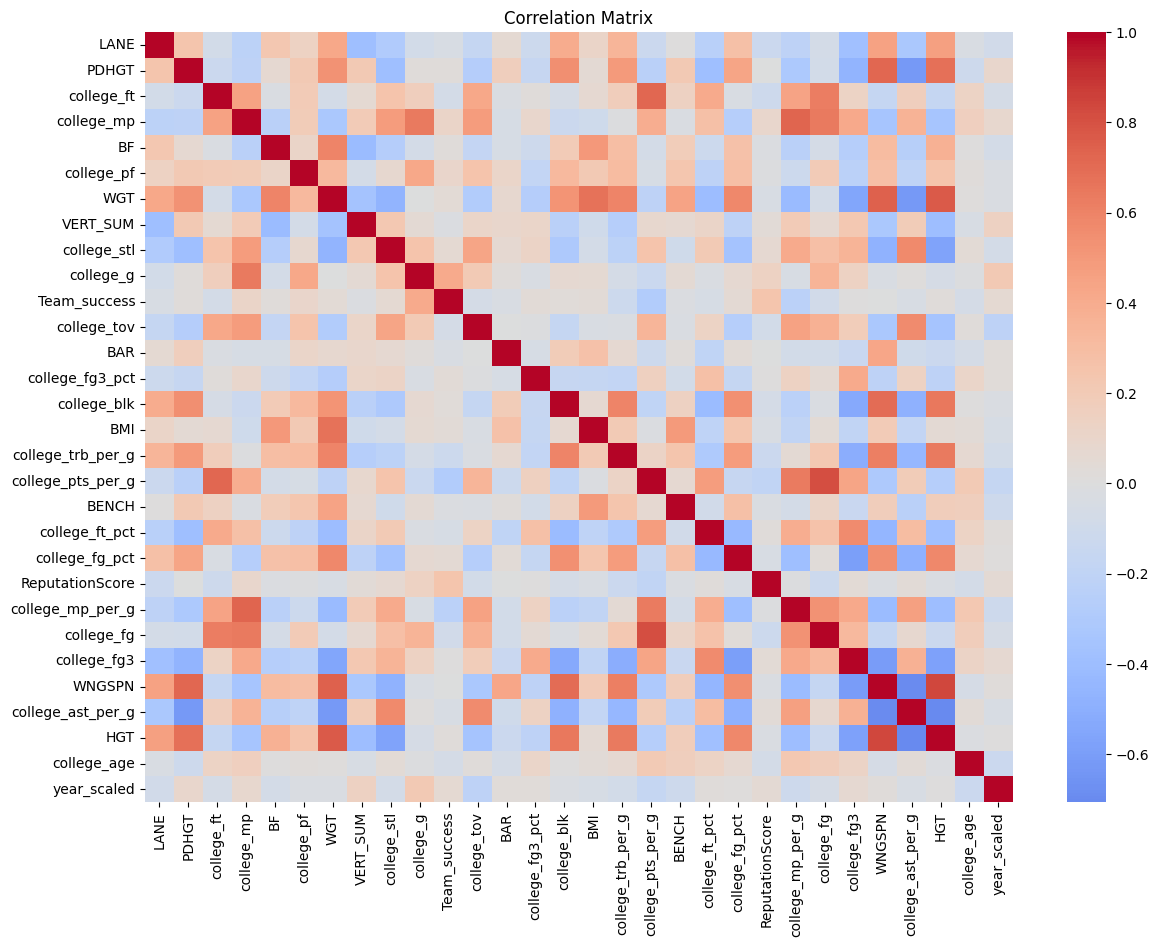


Highly Correlated Feature Pairs (>|0.85|):


In [ ]:
train_df = df[df['YEAR'] <= 2017]
test_df = df[df['YEAR'] > 2017]

X_train = train_df.drop(columns=['performance_rank'])
y_train = train_df['performance_rank']
X_test = test_df.drop(columns=['performance_rank'])
y_test = test_df['performance_rank']

X_train['year_scaled'] = (X_train['YEAR'] - X_train['YEAR'].min()) / (X_train['YEAR'].max() - X_train['YEAR'].min())
X_test['year_scaled'] = (X_test['YEAR'] - X_train['YEAR'].min()) / (X_train['YEAR'].max() - X_train['YEAR'].min())

X_train = X_train.drop(columns=['YEAR'])
X_test = X_test.drop(columns=['YEAR'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

corr_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

high_corr_pairs = []
threshold = 0.85
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_matrix.iloc[i, j]))

print("\nHighly Correlated Feature Pairs (>|0.85|):")
for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
    print(f"{col1} and {col2}: {corr:.2f}")

In [ ]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

model = sm.OLS(y_train, X_train_sm).fit()
preds = model.get_prediction(X_test_sm)
pred_summary = preds.summary_frame(alpha=0.05)

y_pred = pred_summary['mean'].values

lae = np.mean(np.abs(np.log1p(y_test) - np.log1p(y_pred)))
weights = 1 / (y_test + 1)
iwe = np.mean(weights * np.abs(y_test - y_pred))

spearman_corr, _ = spearmanr(y_test, y_pred)

print("\nCustom Evaluation Metrics (Linear Model w/ CI + Drift Awareness):")
print(f"Logarithmic Absolute Error (LAE): {lae:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")


Custom Evaluation Metrics (Linear Model w/ CI + Drift Awareness):
Logarithmic Absolute Error (LAE): 0.5542
Inverse Weighted Error (IWE): 0.8880
Spearman Rank Correlation: 0.3092


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train_ridge = train_df.drop(columns=['performance_rank', 'YEAR']).copy()
X_test_ridge = test_df.drop(columns=['performance_rank', 'YEAR']).copy()

X_train_ridge['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_ridge['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_ridge = train_df['performance_rank']
y_test_ridge = test_df['performance_rank']

scaler_ridge = StandardScaler()
X_train_scaled_ridge = scaler_ridge.fit_transform(X_train_ridge)
X_test_scaled_ridge = scaler_ridge.transform(X_test_ridge)

best_r2 = -np.inf
best_alpha = None
best_y_pred = None
best_model = None

print("\nRidge Regression Tuning:\n")

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled_ridge, y_train_ridge)
    y_pred_ridge = ridge.predict(X_test_scaled_ridge)
    r2 = r2_score(y_test_ridge, y_pred_ridge)
    print(f"Alpha = {alpha} | R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_y_pred = y_pred_ridge
        best_model = ridge

lae_ridge = np.mean(np.abs(np.log1p(y_test_ridge) - np.log1p(best_y_pred)))
weights_ridge = 1 / (y_test_ridge + 1)
iwe_ridge = np.mean(weights_ridge * np.abs(y_test_ridge - best_y_pred))

spearman_corr_ridge, _ = spearmanr(y_test_ridge, best_y_pred)

print("\nCustom Evaluation Metrics (Best Ridge Model):")
print(f"Best Alpha: {best_alpha}")
print(f"R² Score: {best_r2:.4f}")
print(f"Logarithmic Absolute Error (LAE): {lae_ridge:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_ridge:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_ridge:.4f}")


Ridge Regression Tuning:

Alpha = 0.01 | R²: 0.0665
Alpha = 0.1 | R²: 0.0676
Alpha = 1 | R²: 0.0723
Alpha = 10 | R²: 0.0736
Alpha = 100 | R²: 0.0718

Custom Evaluation Metrics (Best Ridge Model):
Best Alpha: 10
R² Score: 0.0736
Logarithmic Absolute Error (LAE): 0.5554
Inverse Weighted Error (IWE): 0.8841
Spearman Rank Correlation: 0.3139


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

X_train_lasso = train_df.drop(columns=['performance_rank', 'YEAR']).copy()
X_test_lasso = test_df.drop(columns=['performance_rank', 'YEAR']).copy()

X_train_lasso['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_lasso['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_lasso = train_df['performance_rank']
y_test_lasso = test_df['performance_rank']

scaler_lasso = StandardScaler()
X_train_scaled_lasso = scaler_lasso.fit_transform(X_train_lasso)
X_test_scaled_lasso = scaler_lasso.transform(X_test_lasso)

best_r2 = -np.inf
best_alpha = None
best_y_pred = None
best_model = None

alphas = [0.01, 0.05, 0.075, 0.1, 0.125, 0.15]

print("\nLasso Regression Tuning:\n")

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=50000, tol=1e-4)
    lasso.fit(X_train_scaled_lasso, y_train_lasso)
    y_pred_lasso = lasso.predict(X_test_scaled_lasso)
    r2 = r2_score(y_test_lasso, y_pred_lasso)
    print(f"Alpha = {alpha} | R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_y_pred = y_pred_lasso
        best_model = lasso

lae_lasso = np.mean(np.abs(np.log1p(y_test_lasso) - np.log1p(best_y_pred)))
weights_lasso = 1 / (y_test_lasso + 1)
iwe_lasso = np.mean(weights_lasso * np.abs(y_test_lasso - best_y_pred))

spearman_corr_lasso, _ = spearmanr(y_test_lasso, best_y_pred)

print("\nCustom Evaluation Metrics (Best Lasso Model):")
print(f"Best Alpha: {best_alpha}")
print(f"R² Score: {best_r2:.4f}")
print(f"Logarithmic Absolute Error (LAE): {lae_lasso:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_lasso:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_lasso:.4f}")


Lasso Regression Tuning:

Alpha = 0.01 | R²: 0.0748
Alpha = 0.05 | R²: 0.0733
Alpha = 0.075 | R²: 0.0763
Alpha = 0.1 | R²: 0.0783
Alpha = 0.125 | R²: 0.0793
Alpha = 0.15 | R²: 0.0799

Custom Evaluation Metrics (Best Lasso Model):
Best Alpha: 0.15
R² Score: 0.0799
Logarithmic Absolute Error (LAE): 0.5588
Inverse Weighted Error (IWE): 0.8944
Spearman Rank Correlation: 0.3328


In [ ]:
y_true = np.array(y_test_ridge).flatten()
y_pred = np.array(best_y_pred).flatten()

abs_error = np.abs(y_true - y_pred)

within_3 = np.mean(abs_error <= 3) * 100
within_5 = np.mean(abs_error <= 5) * 100
within_10 = np.mean(abs_error <= 10) * 100
within_15 = np.mean(abs_error <= 15) * 100
within_20 = np.mean(abs_error <= 20) * 100

print("\nPrediction Accuracy Ranges (Best Ridge Model):")
print(f"Within ±3 picks:  {within_3:.2f}%")
print(f"Within ±5 picks:  {within_5:.2f}%")
print(f"Within ±10 picks: {within_10:.2f}%")
print(f"Within ±15 picks: {within_15:.2f}%")
print(f"Within ±20 picks: {within_20:.2f}%")


Prediction Accuracy Ranges (Best Ridge Model):
Within ±3 picks:  11.76%
Within ±5 picks:  19.12%
Within ±10 picks: 42.65%
Within ±15 picks: 57.35%
Within ±20 picks: 83.82%


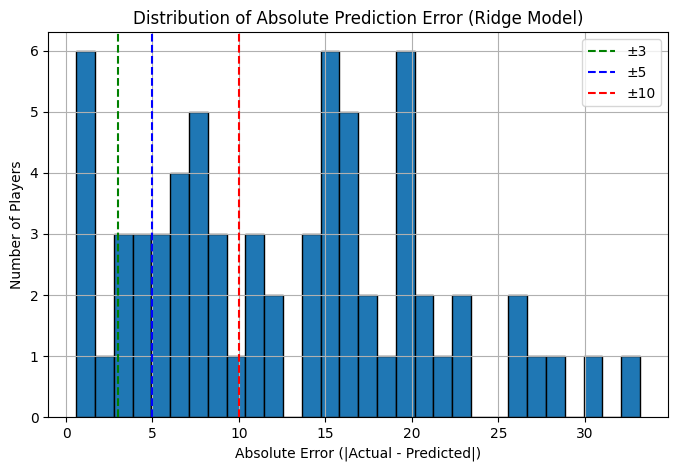

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(abs_error, bins=30, edgecolor='black')
plt.axvline(3, color='green', linestyle='--', label='±3')
plt.axvline(5, color='blue', linestyle='--', label='±5')
plt.axvline(10, color='red', linestyle='--', label='±10')
plt.title("Distribution of Absolute Prediction Error (Ridge Model)")
plt.xlabel("Absolute Error (|Actual - Predicted|)")
plt.ylabel("Number of Players")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
sample_players = X_test_ridge.sample(10, random_state=42)
sample_y_true = y_test_ridge.loc[sample_players.index]
sample_names = draft_prediction.loc[sample_players.index, 'name']

sample_scaled = scaler_ridge.transform(sample_players)
ridge_sample = best_model.predict(sample_scaled)

predictions_df = pd.DataFrame({
    'Name': sample_names.values,
    'Actual Pick': sample_y_true.values,
    'Ridge Predicted Pick': np.clip(np.round(ridge_sample, 2), 1, None)
})

print("\n10 Random Player Predictions (Best Ridge Model):")
print(predictions_df.to_string(index=False))


10 Random Player Predictions (Best Ridge Model):
            Name  Actual Pick  Ridge Predicted Pick
Donte DiVincenzo         12.0                 22.80
  Keldon Johnson          5.0                 21.97
  Brandon Clarke         14.0                 18.38
        Kyle Guy         41.0                 24.74
Kevin Porter Jr.          8.0                 27.02
   Miles Bridges          7.0                 23.02
     Josh Okogie         29.0                 19.81
  Jarrett Culver         39.0                 19.61
   Landry Shamet         18.0                 30.37
     Tyler Herro          4.0                 18.06


In [ ]:
feature_names = list(train_df.drop(columns=['performance_rank', 'YEAR']).columns) + ['year_scaled']

ridge_coefficients = best_model.coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': ridge_coefficients
}).sort_values(by='Ridge Coefficient', key=abs, ascending=False)

print("\nFeature Importances (Ridge Coefficients):")
print(importance_df.to_string(index=False))


Feature Importances (Ridge Coefficients):
          Feature  Ridge Coefficient
      college_age           4.204368
      college_stl          -2.715847
   college_fg_pct          -1.854901
     Team_success          -1.766109
      year_scaled           1.498195
college_pts_per_g          -1.294596
  ReputationScore          -1.155745
             LANE           1.093409
   college_ft_pct          -0.968638
            BENCH           0.866363
college_trb_per_g          -0.860973
              WGT          -0.835767
       college_fg          -0.797757
         VERT_SUM          -0.634681
            PDHGT          -0.425689
       college_mp           0.399315
       college_pf           0.315850
college_ast_per_g          -0.306892
              BMI          -0.298820
  college_fg3_pct           0.261968
               BF           0.236309
      college_tov           0.208932
      college_fg3          -0.159737
        college_g           0.017289
              BAR          -0.00